In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\Data analysis NTI\Final project\governance_dataset_dirty_2000_rows.csv")
df

,Company_ID,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters
0,CMP0,Company_0,Manufacturing,Germany,CEO_0,7.0,not known,-5.00,9.69,Unknown,NaN,9999999,not audited,New York
1,CMP1,Company_1,Retail,India,CEO_1,7.0,6,37.47,unknown,1950,4.883085e+09,11325,not audited,New York
2,CMP2,Company_2,Healthcare,Brazil,ceo_2,9.0,3,-5.00,0,Unknown,NaN,16814,not audited,Cairo
3,CMP3,Company_3,Manufacturing,Egypt,CEO_3,12.0,not known,-5.00,0,Unknown,NaN,9999999,10-11-2018,Paris
4,CMP4,Company_4,Finance,India,ceo_4,9.0,4,-5.00,0,Unknown,NaN,9999999,not audited,Sao Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,CMP1995,Company_1995,Healthcare,Egypt,NaN,5.0,not known,NaN,0.59,1983,2.920614e+09,9999999,not audited,Berlin
1996,CMP1996,Company_1996,Healthcare,India,CEO_1996,5.0,not known,150.00,0,Unknown,2.328735e+09,9999999,16-04-2022,Dubai
1997,CMP1997,Company_1997,Finance,Brazil,CEO_1997,12.0,6,31.77,8.09,1911,1.119954e+09,9763,05-03-2015,New York
1998,CMP1998,Company_1998,Finance,France,ceo_1998,12.0,not known,NaN,unknown,Unknown,NaN,13320,not audited,Mumbai


In [3]:
df.duplicated().any()

np.False_

In [4]:
df.isnull().any()

Company_ID               False
Company_Name             False
Sector                   False
Country                  False
CEO                       True
Board_Size                True
Independent_Directors    False
ESG_Score                 True
Corruption_Risk_Score    False
Year_Established         False
Revenue_USD               True
Num_Employees            False
Last_Audit_Date          False
Headquarters             False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_ID             2000 non-null   object 
 1   Company_Name           2000 non-null   object 
 2   Sector                 2000 non-null   object 
 3   Country                2000 non-null   object 
 4   CEO                    1505 non-null   object 
 5   Board_Size             1291 non-null   float64
 6   Independent_Directors  2000 non-null   object 
 7   ESG_Score              1456 non-null   float64
 8   Corruption_Risk_Score  2000 non-null   object 
 9   Year_Established       2000 non-null   object 
 10  Revenue_USD            650 non-null    float64
 11  Num_Employees          2000 non-null   int64  
 12  Last_Audit_Date        2000 non-null   object 
 13  Headquarters           2000 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 218.9+

In [6]:
#to split text from numbers
df[['Company_Prefix', 'Company_Number']] = df['Company_ID'].str.extract(r'([A-Za-z]+)(\d+)') 
print(df[['Company_ID', 'Company_Prefix', 'Company_Number']].head())


  Company_ID Company_Prefix Company_Number
0       CMP0            CMP              0
1       CMP1            CMP              1
2       CMP2            CMP              2
3       CMP3            CMP              3
4       CMP4            CMP              4


In [7]:
df=df.drop(columns='Company_Prefix')
df=df.drop(columns='Company_ID')


In [8]:
df = df.rename(columns={'Company_Number': 'Company_ID'})
df

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID
0,Company_0,Manufacturing,Germany,CEO_0,7.0,not known,-5.00,9.69,Unknown,NaN,9999999,not audited,New York,0
1,Company_1,Retail,India,CEO_1,7.0,6,37.47,unknown,1950,4.883085e+09,11325,not audited,New York,1
2,Company_2,Healthcare,Brazil,ceo_2,9.0,3,-5.00,0,Unknown,NaN,16814,not audited,Cairo,2
3,Company_3,Manufacturing,Egypt,CEO_3,12.0,not known,-5.00,0,Unknown,NaN,9999999,10-11-2018,Paris,3
4,Company_4,Finance,India,ceo_4,9.0,4,-5.00,0,Unknown,NaN,9999999,not audited,Sao Paulo,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Company_1995,Healthcare,Egypt,NaN,5.0,not known,NaN,0.59,1983,2.920614e+09,9999999,not audited,Berlin,1995
1996,Company_1996,Healthcare,India,CEO_1996,5.0,not known,150.00,0,Unknown,2.328735e+09,9999999,16-04-2022,Dubai,1996
1997,Company_1997,Finance,Brazil,CEO_1997,12.0,6,31.77,8.09,1911,1.119954e+09,9763,05-03-2015,New York,1997
1998,Company_1998,Finance,France,ceo_1998,12.0,not known,NaN,unknown,Unknown,NaN,13320,not audited,Mumbai,1998


In [9]:
df["Company_ID"]=df["Company_ID"].astype('int')
df["Company_ID"].dtype

dtype('int64')

In [10]:
#Convert to Lowercase,Remove Extra Whitespace
df['Company_Name'] = df['Company_Name'].str.lower().str.strip()

In [11]:
#Dropping the duplicates while keeping the first entry
df.drop_duplicates(subset=['Company_Name'], keep='first')

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID
0,company_0,Manufacturing,Germany,CEO_0,7.0,not known,-5.00,9.69,Unknown,NaN,9999999,not audited,New York,0
1,company_1,Retail,India,CEO_1,7.0,6,37.47,unknown,1950,4.883085e+09,11325,not audited,New York,1
2,company_2,Healthcare,Brazil,ceo_2,9.0,3,-5.00,0,Unknown,NaN,16814,not audited,Cairo,2
3,company_3,Manufacturing,Egypt,CEO_3,12.0,not known,-5.00,0,Unknown,NaN,9999999,10-11-2018,Paris,3
4,company_4,Finance,India,ceo_4,9.0,4,-5.00,0,Unknown,NaN,9999999,not audited,Sao Paulo,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,company_1995,Healthcare,Egypt,NaN,5.0,not known,NaN,0.59,1983,2.920614e+09,9999999,not audited,Berlin,1995
1996,company_1996,Healthcare,India,CEO_1996,5.0,not known,150.00,0,Unknown,2.328735e+09,9999999,16-04-2022,Dubai,1996
1997,company_1997,Finance,Brazil,CEO_1997,12.0,6,31.77,8.09,1911,1.119954e+09,9763,05-03-2015,New York,1997
1998,company_1998,Finance,France,ceo_1998,12.0,not known,NaN,unknown,Unknown,NaN,13320,not audited,Mumbai,1998


In [12]:
# See all unique sectors
print(df['Sector'].unique())

['Manufacturing' 'Retail' 'Healthcare' 'Finance' 'Energy' 'Technology']


In [13]:
#Convert to Lowercase,Remove Extra Whitespace
df['Sector'] = df['Sector'].str.lower().str.strip()

In [14]:
df['CEO'] = df['CEO'].str.lower().str.strip()

In [15]:
print(df['Country'].unique())

['Germany' 'India' 'Brazil' 'Egypt' 'France' 'UAE' 'USA' 'UK']


In [16]:
# 1. Fill missing (NaN) values with the string 'Unknown'
df['CEO'] = df['CEO'].fillna('Unknown')

In [17]:
# Convert the column to a numeric type, forcing errors into 'NaN'
df['Board_Size'] = pd.to_numeric(df['Board_Size'], errors='coerce')


In [18]:
# Calculate the median
median_value = df['Board_Size'].median()
median_value

9.0

In [19]:
# Fill missing values with the median
df['Board_Size'].fillna(median_value, inplace=True)

# Convert the column to an integer type
df['Board_Size'] = df['Board_Size'].astype(int)

C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\781621639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Board_Size'].fillna(median_value, inplace=True)


In [20]:
#  Convert column to numeric, turning 'not known' into NaN
df['Independent_Directors'] = pd.to_numeric(df['Independent_Directors'], errors='coerce')


In [21]:
# Calculate the median and fill NaN values with it
median_Directors = df['Independent_Directors'].median()
median_Directors

4.0

In [22]:
df['Independent_Directors'].fillna(median_Directors, inplace=True)

C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\3256498408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Independent_Directors'].fillna(median_Directors, inplace=True)


In [23]:
#  Convert the column to integer type
df['Independent_Directors'] = df['Independent_Directors'].astype(int)

In [24]:
#Convert column to numeric, coercing errors
df['Corruption_Risk_Score'] = pd.to_numeric(df['Corruption_Risk_Score'], errors='coerce')

In [25]:
#Handle Missing Values (NaN)
median_score = df['Corruption_Risk_Score'].median()
median_score

0.22

In [26]:
df['Corruption_Risk_Score'].fillna(median_score, inplace=True)

C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\1536415120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Corruption_Risk_Score'].fillna(median_score, inplace=True)


In [27]:
# 1. Convert the column to numbers. Any text like "Unknown" will become a missing value (NaN).
df['Year_Established'] = pd.to_numeric(df['Year_Established'], errors='coerce')

In [28]:
# 2. Calculate the median of the available years.
median_year = df['Year_Established'].median()
median_year


1960.5

In [29]:
# 3. Fill any missing values (NaNs) with the median year.
df['Year_Established']=df['Year_Established'].fillna(1960)

In [30]:
# 4. Convert the entire column to whole numbers (integers).
df['Year_Established'] = df['Year_Established'].astype(int)

In [31]:
df

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID
0,company_0,manufacturing,Germany,ceo_0,7,4,-5.00,9.69,1960,NaN,9999999,not audited,New York,0
1,company_1,retail,India,ceo_1,7,6,37.47,0.22,1950,4.883085e+09,11325,not audited,New York,1
2,company_2,healthcare,Brazil,ceo_2,9,3,-5.00,0.00,1960,NaN,16814,not audited,Cairo,2
3,company_3,manufacturing,Egypt,ceo_3,12,4,-5.00,0.00,1960,NaN,9999999,10-11-2018,Paris,3
4,company_4,finance,India,ceo_4,9,4,-5.00,0.00,1960,NaN,9999999,not audited,Sao Paulo,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,company_1995,healthcare,Egypt,Unknown,5,4,NaN,0.59,1983,2.920614e+09,9999999,not audited,Berlin,1995
1996,company_1996,healthcare,India,ceo_1996,5,4,150.00,0.00,1960,2.328735e+09,9999999,16-04-2022,Dubai,1996
1997,company_1997,finance,Brazil,ceo_1997,12,6,31.77,8.09,1911,1.119954e+09,9763,05-03-2015,New York,1997
1998,company_1998,finance,France,ceo_1998,12,4,NaN,0.22,1960,NaN,13320,not audited,Mumbai,1998


In [32]:
# converted will become NaN (Not a Number).
df['ESG_Score'] = pd.to_numeric(df['ESG_Score'], errors='coerce')


In [33]:
# Calculate the median of the valid ESG_Score data
median_ESG_Score = df['ESG_Score'].median()
median_ESG_Score

47.25

In [34]:
# Fill any missing values (NaNs) with the calculated median
df['ESG_Score'].fillna(median_ESG_Score, inplace=True)
df['ESG_Score'].isna().sum()

C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\3055115511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ESG_Score'].fillna(median_ESG_Score, inplace=True)


np.int64(0)

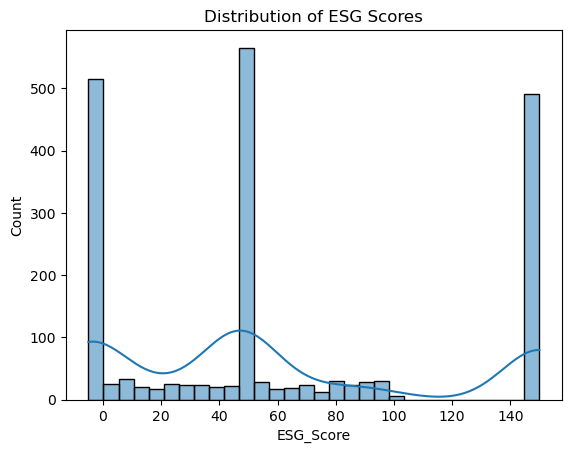

In [35]:

sns.histplot(df["ESG_Score"], bins=30, kde=True)
plt.title("Distribution of ESG Scores")
plt.show()


In [ ]:

df["ESG_Score"] = df["ESG_Score"].clip(lower=0, upper=100)


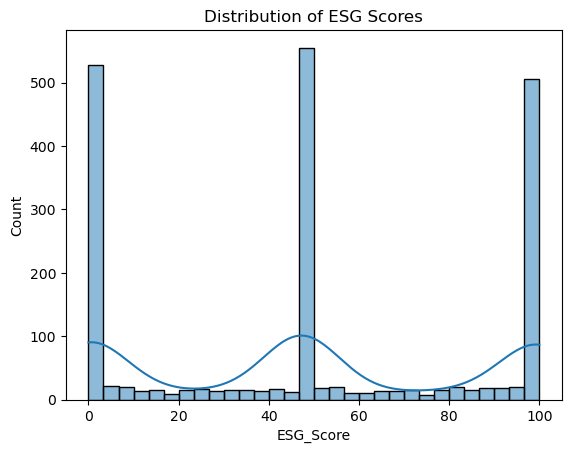

In [37]:
sns.histplot(df["ESG_Score"], bins=30, kde=True)
plt.title("Distribution of ESG Scores")
plt.show()


## Detecting the outliers in Num_Employees

In [38]:
abs_median = abs(df["Num_Employees"]-df["Num_Employees"].median())
abs_median

0       9980417.5
1          8256.5
2          2767.5
3       9980417.5
4       9980417.5
          ...    
1995    9980417.5
1996    9980417.5
1997       9818.5
1998       6261.5
1999      11537.5
Name: Num_Employees, Length: 2000, dtype: float64

In [39]:
MAD = abs_median.median()
MAD

19401.5

In [40]:
mod_z_scores = 0.6745*((df["Num_Employees"]-df["Num_Employees"].median())/MAD)
mod_z_scores

0       346.972739
1        -0.287040
2        -0.096213
3       346.972739
4       346.972739
           ...    
1995    346.972739
1996    346.972739
1997     -0.341344
1998     -0.217683
1999     -0.401105
Name: Num_Employees, Length: 2000, dtype: float64

In [41]:
mod_z_scores[(mod_z_scores > 3 ) | (mod_z_scores < -3)]

0       346.972739
3       346.972739
4       346.972739
6       346.972739
7       346.972739
           ...    
1989    346.972739
1990    346.972739
1993    346.972739
1995    346.972739
1996    346.972739
Name: Num_Employees, Length: 985, dtype: float64

In [42]:
Data=pd.concat([df, mod_z_scores], axis=1 )
Data

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID,Num_Employees
0,company_0,manufacturing,Germany,ceo_0,7,4,0.00,9.69,1960,NaN,9999999,not audited,New York,0,346.972739
1,company_1,retail,India,ceo_1,7,6,37.47,0.22,1950,4.883085e+09,11325,not audited,New York,1,-0.287040
2,company_2,healthcare,Brazil,ceo_2,9,3,0.00,0.00,1960,NaN,16814,not audited,Cairo,2,-0.096213
3,company_3,manufacturing,Egypt,ceo_3,12,4,0.00,0.00,1960,NaN,9999999,10-11-2018,Paris,3,346.972739
4,company_4,finance,India,ceo_4,9,4,0.00,0.00,1960,NaN,9999999,not audited,Sao Paulo,4,346.972739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,company_1995,healthcare,Egypt,Unknown,5,4,47.25,0.59,1983,2.920614e+09,9999999,not audited,Berlin,1995,346.972739
1996,company_1996,healthcare,India,ceo_1996,5,4,100.00,0.00,1960,2.328735e+09,9999999,16-04-2022,Dubai,1996,346.972739
1997,company_1997,finance,Brazil,ceo_1997,12,6,31.77,8.09,1911,1.119954e+09,9763,05-03-2015,New York,1997,-0.341344
1998,company_1998,finance,France,ceo_1998,12,4,47.25,0.22,1960,NaN,13320,not audited,Mumbai,1998,-0.217683


In [43]:
print(Data.columns)


Index(['Company_Name', 'Sector', 'Country', 'CEO', 'Board_Size',
       'Independent_Directors', 'ESG_Score', 'Corruption_Risk_Score',
       'Year_Established', 'Revenue_USD', 'Num_Employees', 'Last_Audit_Date',
       'Headquarters', 'Company_ID', 'Num_Employees'],
      dtype='object')


In [44]:
Data.columns = ['Company_Name', 'Sector', 'Country', 'CEO', 'Board_Size',
       'Independent_Directors', 'ESG_Score', 'Corruption_Risk_Score',
       'Year_Established', 'Revenue_USD', 'Num_Employees', 'Last_Audit_Date',
       'Headquarters', 'Company_ID', 'Num_Employees_ModZ']


In [45]:
Data.rename(columns = {0 : "Data_points", 1 :"mod_z_scores"},inplace = True)
Data

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID,Num_Employees_ModZ
0,company_0,manufacturing,Germany,ceo_0,7,4,0.00,9.69,1960,NaN,9999999,not audited,New York,0,346.972739
1,company_1,retail,India,ceo_1,7,6,37.47,0.22,1950,4.883085e+09,11325,not audited,New York,1,-0.287040
2,company_2,healthcare,Brazil,ceo_2,9,3,0.00,0.00,1960,NaN,16814,not audited,Cairo,2,-0.096213
3,company_3,manufacturing,Egypt,ceo_3,12,4,0.00,0.00,1960,NaN,9999999,10-11-2018,Paris,3,346.972739
4,company_4,finance,India,ceo_4,9,4,0.00,0.00,1960,NaN,9999999,not audited,Sao Paulo,4,346.972739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,company_1995,healthcare,Egypt,Unknown,5,4,47.25,0.59,1983,2.920614e+09,9999999,not audited,Berlin,1995,346.972739
1996,company_1996,healthcare,India,ceo_1996,5,4,100.00,0.00,1960,2.328735e+09,9999999,16-04-2022,Dubai,1996,346.972739
1997,company_1997,finance,Brazil,ceo_1997,12,6,31.77,8.09,1911,1.119954e+09,9763,05-03-2015,New York,1997,-0.341344
1998,company_1998,finance,France,ceo_1998,12,4,47.25,0.22,1960,NaN,13320,not audited,Mumbai,1998,-0.217683


In [46]:
with_outliers= df[(Data["Num_Employees_ModZ"] > 3) | (Data["Num_Employees_ModZ"]<-3)]
with_outliers

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID
0,company_0,manufacturing,Germany,ceo_0,7,4,0.00,9.69,1960,NaN,9999999,not audited,New York,0
3,company_3,manufacturing,Egypt,ceo_3,12,4,0.00,0.00,1960,NaN,9999999,10-11-2018,Paris,3
4,company_4,finance,India,ceo_4,9,4,0.00,0.00,1960,NaN,9999999,not audited,Sao Paulo,4
6,company_6,manufacturing,UAE,ceo_6,9,2,51.83,0.22,1963,1.072569e+09,9999999,15-02-2015,Cairo,6
7,company_7,energy,UAE,ceo_7,7,6,0.00,0.00,1960,NaN,9999999,08-05-2018,Sao Paulo,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,company_1989,technology,France,ceo_1989,5,4,100.00,1.47,1916,4.932076e+09,9999999,not audited,Paris,1989
1990,company_1990,healthcare,India,ceo_1990,7,4,100.00,0.00,2017,NaN,9999999,not audited,New York,1990
1993,company_1993,energy,Egypt,ceo_1993,9,3,47.25,4.98,1979,NaN,9999999,not audited,New York,1993
1995,company_1995,healthcare,Egypt,Unknown,5,4,47.25,0.59,1983,2.920614e+09,9999999,not audited,Berlin,1995


## Replace the outliers 

In [47]:
placeholder = 9999999
# Replace the placeholder with NumPy's 'Not a Number' (NaN)
df['Num_Employees'] = df['Num_Employees'].replace(placeholder, np.nan)


In [48]:
# Calculate the median of the column, ignoring the NaNs
median_employees = df['Num_Employees'].median()
median_employees

9865.0

In [49]:
# Fill the NaN values with the calculated median
df['Num_Employees'].fillna(median_employees, inplace=True)

# Ensure the column is of integer type
df['Num_Employees'] = df['Num_Employees'].astype(int)


C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\184048941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Employees'].fillna(median_employees, inplace=True)


In [50]:
# Convert column to datetime, turning errors into NaT (Not a Time)
df['Last_Audit_Date'] = pd.to_datetime(df['Last_Audit_Date'], errors='coerce')


C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\3947589969.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last_Audit_Date'] = pd.to_datetime(df['Last_Audit_Date'], errors='coerce')


In [51]:
# Find the most recent valid date to use for filling
most_recent_date = df['Last_Audit_Date'].max()
most_recent_date

Timestamp('2023-12-30 00:00:00')

In [52]:
# Fill all missing (NaT) values with the most recent date
df['Last_Audit_Date'].fillna(most_recent_date, inplace=True)

C:\Users\ECC\AppData\Local\Temp\ipykernel_6228\2239830047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last_Audit_Date'].fillna(most_recent_date, inplace=True)


In [53]:
df

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID
0,company_0,manufacturing,Germany,ceo_0,7,4,0.00,9.69,1960,NaN,9865,2023-12-30,New York,0
1,company_1,retail,India,ceo_1,7,6,37.47,0.22,1950,4.883085e+09,11325,2023-12-30,New York,1
2,company_2,healthcare,Brazil,ceo_2,9,3,0.00,0.00,1960,NaN,16814,2023-12-30,Cairo,2
3,company_3,manufacturing,Egypt,ceo_3,12,4,0.00,0.00,1960,NaN,9865,2018-10-11,Paris,3
4,company_4,finance,India,ceo_4,9,4,0.00,0.00,1960,NaN,9865,2023-12-30,Sao Paulo,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,company_1995,healthcare,Egypt,Unknown,5,4,47.25,0.59,1983,2.920614e+09,9865,2023-12-30,Berlin,1995
1996,company_1996,healthcare,India,ceo_1996,5,4,100.00,0.00,1960,2.328735e+09,9865,2022-04-16,Dubai,1996
1997,company_1997,finance,Brazil,ceo_1997,12,6,31.77,8.09,1911,1.119954e+09,9763,2015-05-03,New York,1997
1998,company_1998,finance,France,ceo_1998,12,4,47.25,0.22,1960,NaN,13320,2023-12-30,Mumbai,1998


In [54]:
print(df['Headquarters'].unique())

['New York' 'Cairo' 'Paris' 'Sao Paulo' 'London' 'Dubai' 'Mumbai' 'Berlin']


In [55]:
df['Revenue_USD'].dtype

dtype('float64')

In [56]:
df['Company_ID'].dtype

dtype('int64')

In [57]:
perce=((df['Revenue_USD'].isna().sum())/(df['Company_ID'].count()))*100
perce

np.float64(67.5)

## Model to predict the missing values in Revenue


In [58]:
from sklearn.ensemble import RandomForestRegressor
# Handle the target variable 'ESG_Score'
df['Revenue_USD'] = pd.to_numeric(df['Revenue_USD'], errors='coerce')
#df.loc[df['Revenue_USD'] == -5.00, 'Revenue_USD'] = np.nan

# Create the modeling DataFrame from a copy
df_model = df.copy()

# Convert all necessary columns to numeric for the model
for col in ['Board_Size', 'Independent_Directors', 'Corruption_Risk_Score', 'ESG_Score', 'Num_Employees']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=['Sector', 'Country'])

# Drop columns not used in the model
df_model = df_model.drop(columns=['Company_ID', 'Company_Name', 'CEO', 'Last_Audit_Date', 'Headquarters'])

# Impute missing values in predictor columns
#####*****
for col in df_model.columns:
    if df_model[col].isnull().any() and col != 'Revenue_USD':
        df_model[col].fillna(df_model[col].median(), inplace=True)

# --- 2. Split data and define training/prediction sets ---
train_df = df_model[df_model['Revenue_USD'].notna()]
predict_df = df_model[df_model['Revenue_USD'].isna()]

X_train = train_df.drop('Revenue_USD', axis=1)
y_train = train_df['Revenue_USD']
X_predict = predict_df.drop('Revenue_USD', axis=1).reindex(columns=X_train.columns, fill_value=0)

# --- 3. Train the model and predict missing values ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

if not X_predict.empty:
    predicted_scores = model.predict(X_predict)
    df.loc[df['Revenue_USD'].isnull(), 'Revenue_USD'] = predicted_scores
df['Revenue_USD'] = df['Revenue_USD'].round(2)
# Save the final dataset
df.to_csv('governance_data_final.csv', index=False)

In [59]:
df

,Company_Name,Sector,Country,CEO,Board_Size,Independent_Directors,ESG_Score,Corruption_Risk_Score,Year_Established,Revenue_USD,Num_Employees,Last_Audit_Date,Headquarters,Company_ID
0,company_0,manufacturing,Germany,ceo_0,7,4,0.00,9.69,1960,2.446275e+09,9865,2023-12-30,New York,0
1,company_1,retail,India,ceo_1,7,6,37.47,0.22,1950,4.883085e+09,11325,2023-12-30,New York,1
2,company_2,healthcare,Brazil,ceo_2,9,3,0.00,0.00,1960,2.200447e+09,16814,2023-12-30,Cairo,2
3,company_3,manufacturing,Egypt,ceo_3,12,4,0.00,0.00,1960,2.843322e+09,9865,2018-10-11,Paris,3
4,company_4,finance,India,ceo_4,9,4,0.00,0.00,1960,3.214138e+09,9865,2023-12-30,Sao Paulo,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,company_1995,healthcare,Egypt,Unknown,5,4,47.25,0.59,1983,2.920614e+09,9865,2023-12-30,Berlin,1995
1996,company_1996,healthcare,India,ceo_1996,5,4,100.00,0.00,1960,2.328735e+09,9865,2022-04-16,Dubai,1996
1997,company_1997,finance,Brazil,ceo_1997,12,6,31.77,8.09,1911,1.119954e+09,9763,2015-05-03,New York,1997
1998,company_1998,finance,France,ceo_1998,12,4,47.25,0.22,1960,2.391468e+09,13320,2023-12-30,Mumbai,1998


In [60]:
def save_dataframe_to_csv(df, governance_data_f):
 
  try:
    df.to_csv(governance_data_f, index=False)
    print(f"✅ Successfully saved cleaned data to '{filename}'")
  except Exception as e:
    print(f"❌ Error saving file: {e}")

In [62]:
ESG = pd.DataFrame(df)
file_path = "E:\Data analysis NTI\Final project/Cleaned_dataGovernance22.xlsx"
ESG.to_excel(file_path, index=False)

file_path

'E:\\Data analysis NTI\\Final project/Cleaned_dataGovernance22.xlsx'